In [1]:
import sys
import pathlib
print(sys.executable)

C:\Users\Acer\anaconda3\envs\dl\python.exe


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
import copy # A module that provides functions for creating copies of objects, useful for avoiding unintended modifications to variables.
import os # A module that provides a way to interact with the operating system, allowing for tasks such as file and directory manipulation.
import torch
from PIL import Image # A module from the Python Imaging Library (PIL) that provides functionality for opening, manipulating, and saving various image file formats.
from torch.utils.data import Dataset # A PyTorch class that represents a dataset and provides an interface for accessing and processing the data during training.
import torchvision
import torchvision.transforms as transforms # A module from the torchvision library that provides common image transformations, such as resizing, cropping, and normalization.
from torch.utils.data import random_split # A function from PyTorch that allows for randomly splitting a dataset into training and validation subsets.
from torch.optim.lr_scheduler import ReduceLROnPlateau # A PyTorch scheduler that adjusts the learning rate during training based on a specified metric, reducing it when the metric plateaus.
import torch.nn as nn # A module in PyTorch that provides classes for defining and building neural networks.
from torchvision import utils # A module from torchvision that contains utility functions for working with images, such as saving and visualizing them.
from torchvision.datasets import ImageFolder
import splitfolders
from torchsummary import summary
import torch.nn.functional as F
import pathlib
from sklearn.metrics import confusion_matrix, classification_report
import itertools # This import statement imports the itertools module, which provides functions for efficient looping and combining of iterables. It can be used for tasks such as generating combinations or permutations of elements.
from tqdm.notebook import trange, tqdm # These functions allow for the creation of progress bars to track the progress of loops or tasks.
from torch import optim
import warnings
warnings.filterwarnings('ignore')

In [3]:
labels_df = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\final year project\backend\metadata.csv")
print(labels_df.head().to_markdown())

|    |   Unnamed: 0 | image           | class   | format   | mode   | shape         |
|---:|-------------:|:----------------|:--------|:---------|:-------|:--------------|
|  0 |            0 | Cancer (1).jpg  | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  1 |            1 | Cancer (1).png  | tumor   | PNG      | L      | (300, 240)    |
|  2 |            2 | Cancer (1).tif  | tumor   | TIFF     | RGB    | (256, 256, 3) |
|  3 |            3 | Cancer (10).jpg | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  4 |            4 | Cancer (10).tif | tumor   | TIFF     | RGB    | (256, 256, 3) |


In [4]:
os.listdir(r"C:\Users\Acer\OneDrive\Desktop\final year project")


['.ipynb_checkpoints',
 'anaconda_projects',
 'backend',
 'docker-compose.yml',
 'final presentation brain tumour.pptx',
 'frontend']

In [5]:
labels_df.shape

(4600, 6)

In [6]:
# Try without the duplicate folder name
data_dir = r'C:\Users\Acer\OneDrive\Desktop\final year project'
data_dir = pathlib.Path(data_dir)

# Verify it exists
if data_dir.exists():
    print(f"✓ Path exists!")
    print(f"Contents: {os.listdir(data_dir)}")
    
    # Now split
    splitfolders.ratio(data_dir, output='brain', seed=20, ratio=(0.8, 0.2))
    
    # New dataset path
    data_dir = r'C:\Users\Acer\OneDrive\Desktop\final year project'
    data_dir = pathlib.Path(data_dir)
else:
    print("✗ Path does not exist. Check the path above.")

✓ Path exists!
Contents: ['.ipynb_checkpoints', 'anaconda_projects', 'backend', 'docker-compose.yml', 'final presentation brain tumour.pptx', 'frontend']


Copying files: 18 files [00:00, 204.37 files/s]


In [7]:
# define transformation
transform = transforms.Compose(
    [
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225])
   ]
)

In [8]:
import os
import shutil
import pathlib
import splitfolders
import torchvision
from torchvision import transforms

# Define transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Project directory (point to backend folder now)
project_dir = r'C:\Users\Acer\OneDrive\Desktop\final year project\backend'

# Training folder
training_path = os.path.join(project_dir, 'Training')
if os.path.exists(training_path):
    print("Contents of Training folder:")
    print(os.listdir(training_path))
else:
    print(f"❌ Training folder not found at: {training_path}")

# Testing folder
testing_path = os.path.join(project_dir, 'Testing')
if os.path.exists(testing_path):
    print("\nContents of Testing folder:")
    print(os.listdir(testing_path))
else:
    print(f"❌ Testing folder not found at: {testing_path}")

# Delete incorrect 'brain' folder if exists
brain_folder = os.path.join(project_dir, 'brain')
if os.path.exists(brain_folder):
    shutil.rmtree(brain_folder)
    print("\n✓ Deleted incorrect 'brain' folder")

# Split only if Training folder exists
if os.path.exists(training_path):
    print("\nSplitting the Training folder...")
    splitfolders.ratio(training_path, output=os.path.join(project_dir, 'brain'),
                       seed=20, ratio=(0.8, 0.2))

    # Point to the newly created split dataset
    data_dir = pathlib.Path(os.path.join(project_dir, 'brain'))

    # Verify structure
    print(f"\n✓ Brain folder created at: {data_dir}")
    print(f"Contents: {os.listdir(data_dir)}")

    # Create datasets
    train_set = torchvision.datasets.ImageFolder(data_dir.joinpath("train"), transform=transform)
    print(f"\n✓ Train set created")
    print(f"  Classes: {train_set.classes}")
    print(f"  Size: {len(train_set)} images")

    val_set = torchvision.datasets.ImageFolder(data_dir.joinpath("val"), transform=transform)
    print(f"\n✓ Validation set created")
    print(f"  Classes: {val_set.classes}")
    print(f"  Size: {len(val_set)} images")
else:
    print("\n⚠️ Cannot split dataset because Training folder is missing.")


Contents of Training folder:
['glioma', 'meningioma', 'notumor', 'pituitary']

Contents of Testing folder:
['glioma', 'meningioma', 'notumor', 'pituitary']

✓ Deleted incorrect 'brain' folder

Splitting the Training folder...


Copying files: 5712 files [00:13, 424.93 files/s]



✓ Brain folder created at: C:\Users\Acer\OneDrive\Desktop\final year project\backend\brain
Contents: ['train', 'val']

✓ Train set created
  Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
  Size: 4568 images

✓ Validation set created
  Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
  Size: 1144 images


Classes in dataset: ['glioma', 'meningioma', 'notumor', 'pituitary']
Class to index mapping: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Label mapping: {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}


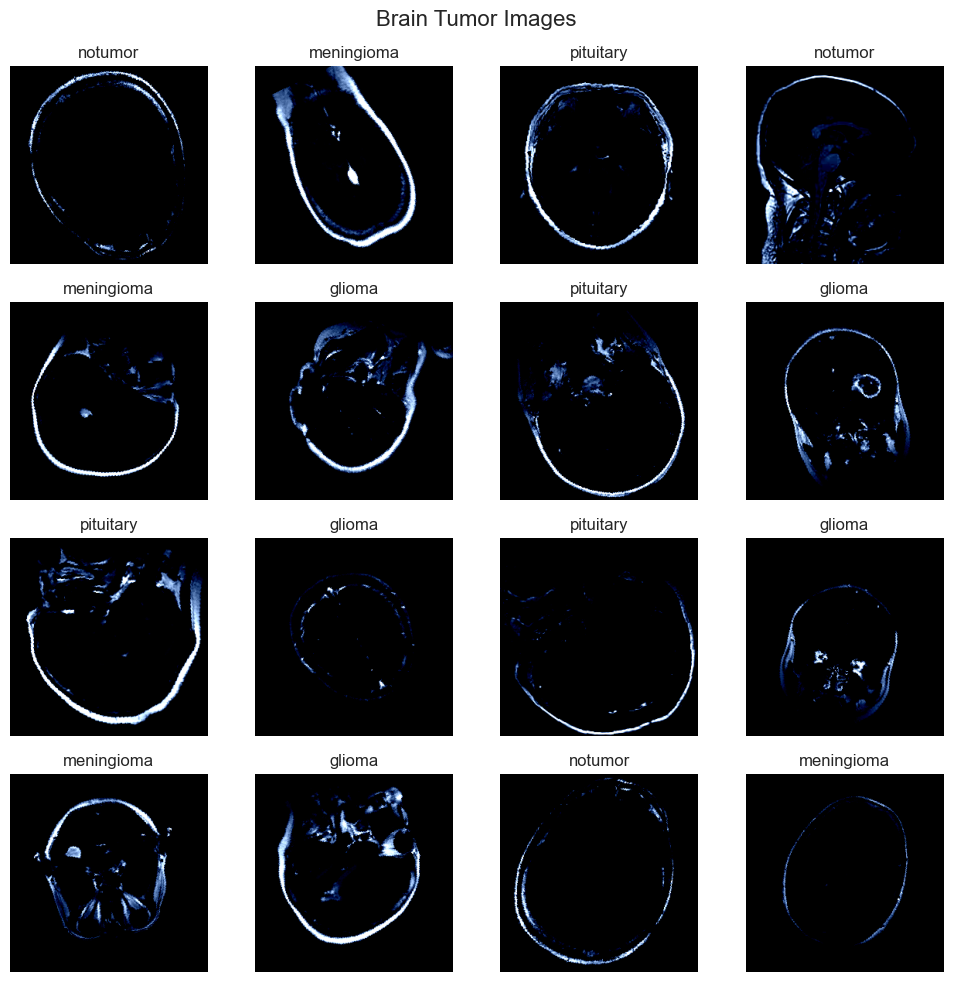

In [9]:
# First, check what classes you actually have
print(f"Classes in dataset: {train_set.classes}")
print(f"Class to index mapping: {train_set.class_to_idx}")

# Automatically create the correct label mapping
CLA_label = {i: class_name for i, class_name in enumerate(train_set.classes)}
print(f"Label mapping: {CLA_label}")

# Now plot the images
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(CLA_label[label])
    plt.axis("off")
    img_np = img.numpy().transpose((1, 2, 0))
    # Clip pixel values to [0, 1]
    img_valid_range = np.clip(img_np, 0, 1)
    plt.imshow(img_valid_range)

plt.suptitle('Brain Tumor Images', y=0.98, fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)

# Verify the dataloaders
print(f"✓ DataLoaders created successfully")
print(f"  Batch size: {batch_size}")
print(f"  Training batches: {len(train_loader)}")
print(f"  Validation batches: {len(val_loader)}")
print(f"  Total training images: {len(train_set)}")
print(f"  Total validation images: {len(val_set)}")

# Test loading a batch
images, labels = next(iter(train_loader))
print(f"\n✓ Sample batch loaded:")
print(f"  Images shape: {images.shape}")  # Should be [64, 3, height, width]
print(f"  Labels shape: {labels.shape}")  # Should be [64]
print(f"  Label distribution in batch: {labels.unique(return_counts=True)}")

✓ DataLoaders created successfully
  Batch size: 64
  Training batches: 72
  Validation batches: 18
  Total training images: 4568
  Total validation images: 1144

✓ Sample batch loaded:
  Images shape: torch.Size([64, 3, 256, 256])
  Labels shape: torch.Size([64])
  Label distribution in batch: (tensor([0, 1, 2, 3]), tensor([14, 14, 18, 18]))


In [11]:
for key, value in {'Training data': train_loader, "Validation data": val_loader}.items():
    for X, y in value:
        print(f"{key}:")
        print(f"  Shape of X: {X.shape}")  # Should be [batch_size, channels, height, width]
        print(f"  Shape of y: {y.shape} {y.dtype}")  # Should be [batch_size]
        print(f"  X min/max values: {X.min():.3f} / {X.max():.3f}")
        print(f"  Unique labels in batch: {y.unique().tolist()}")
        print()
        break

Training data:
  Shape of X: torch.Size([64, 3, 256, 256])
  Shape of y: torch.Size([64]) torch.int64
  X min/max values: -2.118 / 2.640
  Unique labels in batch: [0, 1, 2, 3]

Validation data:
  Shape of X: torch.Size([64, 3, 256, 256])
  Shape of y: torch.Size([64]) torch.int64
  X min/max values: -2.118 / 2.640
  Unique labels in batch: [0, 1, 2, 3]



In [12]:
def findConv2dOutShape(hin, win, conv, pool=2):
    """
    Calculate output height and width after a Conv2d layer and optional pooling.
    
    Args:
        hin: Input height
        win: Input width
        conv: Conv2d layer object
        pool: Pooling factor (default=2). Set to None or False to skip pooling.
    
    Returns:
        (hout, wout): Output height and width as integers
    """
    # Get conv arguments
    kernel_size = conv.kernel_size
    stride = conv.stride
    padding = conv.padding
    dilation = conv.dilation

    # Calculate output dimensions using Conv2d formula
    hout = np.floor((hin + 2*padding[0] - dilation[0]*(kernel_size[0]-1) - 1) / stride[0] + 1)
    wout = np.floor((win + 2*padding[1] - dilation[1]*(kernel_size[1]-1) - 1) / stride[1] + 1)

    # Apply pooling if specified
    if pool:
        hout /= pool
        wout /= pool
    
    return int(hout), int(wout)


# Example usage to verify it works:
# Test with a sample convolution
test_conv = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
h_out, w_out = findConv2dOutShape(224, 224, test_conv, pool=2)
print(f"Input: 224x224 -> After Conv+Pool: {h_out}x{w_out}")

Input: 224x224 -> After Conv+Pool: 112x112


In [13]:
class CNN_TUMOR(nn.Module):
    
    # Network Initialisation
    def __init__(self, params):
        
        super(CNN_TUMOR, self).__init__()
    
        Cin, Hin, Win = params["shape_in"]
        init_f = params["initial_filters"] 
        num_fc1 = params["num_fc1"]  
        num_classes = params["num_classes"] 
        self.dropout_rate = params["dropout_rate"] 
        
        # Convolution Layers
        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3)
        h, w = findConv2dOutShape(Hin, Win, self.conv1)
        
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3)
        h, w = findConv2dOutShape(h, w, self.conv2)
        
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3)
        h, w = findConv2dOutShape(h, w, self.conv3)
        
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3)
        h, w = findConv2dOutShape(h, w, self.conv4)
        
        # Compute the flatten size
        self.num_flatten = h * w * 8 * init_f
        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self, X):
        
        # Convolution & Pool Layers
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2, 2)
        
        # Flatten
        X = X.view(-1, self.num_flatten)
        
        # Fully Connected Layers
        X = F.relu(self.fc1(X))
        X = F.dropout(X, self.dropout_rate, training=self.training)  # Only dropout during training
        X = self.fc2(X)
        
        return F.log_softmax(X, dim=1)


# Now let's create and test the model
params_model = {
    "shape_in": (3, 224, 224),  # Adjust based on your image size
    "initial_filters": 32,
    "num_fc1": 128,
    "num_classes": len(train_set.classes),  # Automatically get number of classes
    "dropout_rate": 0.5
}

# Create model
model = CNN_TUMOR(params_model)
print(f"✓ Model created successfully")
print(f"  Number of classes: {params_model['num_classes']}")
print(f"  Classes: {train_set.classes}")

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"  Using device: {device}")

# Move model to device
model = model.to(device)

# Test with a sample batch
model.eval()
with torch.no_grad():
    sample_input = torch.randn(1, 3, 224, 224).to(device)
    output = model(sample_input)
    print(f"\n✓ Model test successful")
    print(f"  Input shape: {sample_input.shape}")
    print(f"  Output shape: {output.shape}")
    print(f"  Output probabilities sum: {torch.exp(output).sum().item():.4f}")  # Should be ~1.0

✓ Model created successfully
  Number of classes: 4
  Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
  Using device: cuda

✓ Model test successful
  Input shape: torch.Size([1, 3, 224, 224])
  Output shape: torch.Size([1, 4])
  Output probabilities sum: 1.0000


In [14]:
params_model={
        "shape_in": (3,256,256), 
        "initial_filters": 8,    
        "num_fc1": 100,
        "dropout_rate": 0.25,
        "num_classes": 2}

# Create instantiation of Network class
cnn_model = CNN_TUMOR(params_model)

# define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = cnn_model.to(device)

In [15]:
summary(cnn_model, input_size=(3, 256, 256),device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 254, 254]             224
            Conv2d-2         [-1, 16, 125, 125]           1,168
            Conv2d-3           [-1, 32, 60, 60]           4,640
            Conv2d-4           [-1, 64, 28, 28]          18,496
            Linear-5                  [-1, 100]       1,254,500
            Linear-6                    [-1, 2]             202
Total params: 1,279,230
Trainable params: 1,279,230
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.75
Forward/backward pass size (MB): 7.11
Params size (MB): 4.88
Estimated Total Size (MB): 12.74
----------------------------------------------------------------


In [16]:
loss_func = nn.NLLLoss(reduction="sum")

In [17]:
# Define optimizer and learning rate scheduler
opt = optim.Adam(model.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=20)

print("✓ Optimizer and Scheduler configured")
print(f"  Optimizer: Adam")
print(f"  Learning rate: 3e-4 (0.0003)")
print(f"  LR Scheduler: ReduceLROnPlateau")
print(f"    - Reduces LR by factor of 0.5 when validation loss plateaus")
print(f"    - Patience: 20 epochs")
print(f"  Total trainable parameters: {sum(p.numel() for p in model.parameters()):,}")

✓ Optimizer and Scheduler configured
  Optimizer: Adam
  Learning rate: 3e-4 (0.0003)
  LR Scheduler: ReduceLROnPlateau
    - Reduces LR by factor of 0.5 when validation loss plateaus
    - Patience: 20 epochs
  Total trainable parameters: 1,279,230


In [18]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

# Function to compute the loss value per batch of data
def loss_batch(loss_func, output, target, opt=None):
    
    loss = loss_func(output, target) # get loss
    pred = output.argmax(dim=1, keepdim=True) # Get Output Class
    metric_b=pred.eq(target.view_as(pred)).sum().item() # get performance metric
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

# Compute the loss value & performance metric for the entire dataset (epoch)
def loss_epoch(model,loss_func,dataset_dl,opt=None):
    
    run_loss=0.0 
    t_metric=0.0
    len_data=len(dataset_dl.dataset)

    # internal loop over dataset
    for xb, yb in dataset_dl:
        # move batch to device
        xb=xb.to(device)
        yb=yb.to(device)
        output=model(xb) # get model output
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt) # get loss per batch
        run_loss+=loss_b        # update running loss

        if metric_b is not None: # update running metric
            t_metric+=metric_b    
    
    loss=run_loss/float(len_data)  # average loss value
    metric=t_metric/float(len_data) # average metric value
    return loss,metric

In [19]:
def Train_Val(model, params,verbose=False):
    
    # Get the parameters
    epochs=params["epochs"]
    loss_func=params["f_loss"]
    opt=params["optimiser"]
    train_dl=params["train"]
    val_dl=params["val"]
    lr_scheduler=params["lr_change"]
    weight_path=params["weight_path"]
    
    # history of loss values in each epoch
    loss_history={"train": [],"val": []} 
    # histroy of metric values in each epoch
    metric_history={"train": [],"val": []} 
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict()) 
    # initialize best loss to a large value
    best_loss=float('inf') 

# Train Model n_epochs (the progress of training by printing the epoch number and the associated learning rate. It can be helpful for debugging, monitoring the learning rate schedule, or gaining insights into the training process.) 
    
    for epoch in tqdm(range(epochs)):
        
        # Get the Learning Rate
        current_lr=get_lr(opt)
        if(verbose):
            print('Epoch {}/{}, current lr={}'.format(epoch, epochs - 1, current_lr))

        
# Train Model Process

        
        model.train()
        train_loss, train_metric = loss_epoch(model,loss_func,train_dl,opt)

        # collect losses
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        

# Evaluate Model Process

        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model,loss_func,val_dl)
        
        # store best model
        if(val_loss < best_loss):
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), weight_path)
            if(verbose):
                print("Copied best model weights!")
        
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
        
        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            if(verbose):
                print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 

        if(verbose):
            print(f"train loss: {train_loss:.6f}, dev loss: {val_loss:.6f}, accuracy: {100*val_metric:.2f}")
            print("-"*10) 

    # load best model weights
    model.load_state_dict(best_model_wts)
        
    return model, loss_history, metric_history

In [20]:
all_labels = []
for _, y in train_loader:
    all_labels.extend(y.tolist())

print("Unique labels in training set:", sorted(set(all_labels)))


Unique labels in training set: [0, 1, 2, 3]


In [21]:
# Helper functions for training
def get_lr(optimizer):
    """Get current learning rate from optimizer"""
    for param_group in optimizer.param_groups:
        return param_group['lr']

def loss_batch(loss_func, output, target, opt=None):
    """Calculate loss and accuracy for a batch"""
    loss = loss_func(output, target)
    pred = output.argmax(dim=1, keepdim=True)
    metric_b = pred.eq(target.view_as(pred)).sum().item()
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    return loss.item(), metric_b

def loss_epoch(model, loss_func, dataset_dl, opt=None, device=None):
    if device is None:
        device = next(model.parameters()).device

    running_loss = 0.0
    running_corrects = 0
    total = 0
    skipped = 0

    for bi, (xb, yb) in enumerate(dataset_dl):
        try:
            xb = xb.to(device)
            yb = yb.to(device, dtype=torch.long)

            # sanity checks
            if torch.isnan(xb).any() or torch.isinf(xb).any():
                raise RuntimeError("NaN/Inf in inputs")
            if yb.min().item() < 0 or yb.max().item() >= 4:
                raise RuntimeError("Label out of range")

            outputs = model(xb)     # <---- THIS is where the crash will occur
            loss = loss_func(outputs, yb)

            if opt is not None:
                opt.zero_grad()
                loss.backward()
                opt.step()

            running_loss += loss.item()
            preds = outputs.argmax(dim=1)
            running_corrects += (preds == yb).sum().item()
            total += yb.size(0)

        except Exception as e:
            print(f"[WARNING] Skipping batch {bi} due to error: {e}")
            skipped += 1
            continue

    avg_loss = running_loss / (len(dataset_dl) - skipped) if (len(dataset_dl)-skipped)>0 else float('nan')
    acc = running_corrects / total if total>0 else 0.0
    return avg_loss, acc


In [22]:
import torch
import pathlib

ckpt_path = "weights_60epochs.pt"
sd = torch.load(ckpt_path, map_location="cpu")

# If checkpoint is a dict with extras (optim, epoch, etc.), find the model state_dict
if isinstance(sd, dict):
    # common keys: 'model', 'state_dict', 'model_state_dict'
    for k in ("model", "state_dict", "model_state_dict"):
        if k in sd:
            sd = sd[k]
            break

# Inspect shapes for key layers (best-effort)
def safe_shape(d, name):
    return tuple(d[name].shape) if name in d else None

print("Keys in checkpoint (sample):", list(sd.keys())[:12])
print("conv1.weight:", safe_shape(sd, "conv1.weight"))
print("fc1.weight:", safe_shape(sd, "fc1.weight"))
print("fc2.weight:", safe_shape(sd, "fc2.weight"))

# Derive hyperparams
conv1_shape = safe_shape(sd, "conv1.weight")  # [out_ch, in_ch, k, k]
fc1_shape   = safe_shape(sd, "fc1.weight")    # [out_feat, in_feat]
fc2_shape   = safe_shape(sd, "fc2.weight")    # [out_feat, in_feat]

if conv1_shape and fc1_shape and fc2_shape:
    initial_filters = conv1_shape[0]          # out channels of conv1 in checkpoint
    in_channels = conv1_shape[1]
    num_fc1 = fc1_shape[0]                    # fc1 out features
    fc1_in_features = fc1_shape[1]            # flatten size before fc1
    num_classes = fc2_shape[0]                # final classes from checkpoint

    print("Inferred from checkpoint:")
    print("  initial_filters =", initial_filters)
    print("  in_channels =", in_channels)
    print("  num_fc1 =", num_fc1)
    print("  fc1_in_features =", fc1_in_features)
    print("  num_classes =", num_classes)
else:
    raise RuntimeError("Could not find expected keys 'conv1.weight', 'fc1.weight', 'fc2.weight' in checkpoint.")


Keys in checkpoint (sample): ['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'conv4.weight', 'conv4.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias']
conv1.weight: (16, 3, 3, 3)
fc1.weight: (64, 6272)
fc2.weight: (4, 64)
Inferred from checkpoint:
  initial_filters = 16
  in_channels = 3
  num_fc1 = 64
  fc1_in_features = 6272
  num_classes = 4


In [23]:
params_train_continue = {
    "train": train_loader,
    "val": val_loader,
    "epochs": 50,
    "optimiser": opt,
    "lr_change": lr_scheduler,
    "f_loss": nn.CrossEntropyLoss(),      # ✔ FIXED
    "weight_path": "weights_60epochs.pt"
}

print("🚀 Continuing training for 50 more epochs...")
model, loss_hist_continued, metric_hist_continued = Train_Val(
    model, params_train_continue, verbose=True
)

print("\n✓ Continued training complete! (50 extra epochs)")


🚀 Continuing training for 50 more epochs...


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0/49, current lr=0.0003
[WARNING] Skipping batch 0 due to error: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

[WARNING] Skipping batch 1 due to error: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

[WARNING] Skipping batch 2 due to error: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertio

RuntimeError: Error(s) in loading state_dict for CNN_TUMOR:
	While copying the parameter named "conv1.weight", whose dimensions in the model are torch.Size([8, 3, 3, 3]) and whose dimensions in the checkpoint are torch.Size([8, 3, 3, 3]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "conv1.bias", whose dimensions in the model are torch.Size([8]) and whose dimensions in the checkpoint are torch.Size([8]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "conv2.weight", whose dimensions in the model are torch.Size([16, 8, 3, 3]) and whose dimensions in the checkpoint are torch.Size([16, 8, 3, 3]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "conv2.bias", whose dimensions in the model are torch.Size([16]) and whose dimensions in the checkpoint are torch.Size([16]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "conv3.weight", whose dimensions in the model are torch.Size([32, 16, 3, 3]) and whose dimensions in the checkpoint are torch.Size([32, 16, 3, 3]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "conv3.bias", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "conv4.weight", whose dimensions in the model are torch.Size([64, 32, 3, 3]) and whose dimensions in the checkpoint are torch.Size([64, 32, 3, 3]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "conv4.bias", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "fc1.weight", whose dimensions in the model are torch.Size([100, 12544]) and whose dimensions in the checkpoint are torch.Size([100, 12544]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "fc1.bias", whose dimensions in the model are torch.Size([100]) and whose dimensions in the checkpoint are torch.Size([100]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "fc2.weight", whose dimensions in the model are torch.Size([2, 100]) and whose dimensions in the checkpoint are torch.Size([2, 100]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).
	While copying the parameter named "fc2.bias", whose dimensions in the model are torch.Size([2]) and whose dimensions in the checkpoint are torch.Size([2]), an exception occurred : ('CUDA error: device-side assert triggered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n',).

In [ ]:
# 1. Load your best model
model.load_state_dict(torch.load('weights_60epochs.pt'))
model.eval()
print("✓ Best model loaded (94.23% validation accuracy)")

# 2. Visualize the complete training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
ax1.plot(loss_hist["train"], label='Train Loss', linewidth=2)
ax1.plot(loss_hist["val"], label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training History - Loss', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy plot
ax2.plot([m*100 for m in metric_hist["train"]], label='Train Accuracy', linewidth=2)
ax2.plot([m*100 for m in metric_hist["val"]], label='Validation Accuracy', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Training History - Accuracy', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=94.23, color='r', linestyle='--', alpha=0.5, label='Best: 94.23%')

plt.tight_layout()
plt.show()

print(f"\n📊 Training Summary:")
print(f"  Total Epochs: {len(loss_hist['val'])}")
print(f"  Best Validation Accuracy: {max(metric_hist['val'])*100:.2f}%")
print(f"  Final Train Loss: {loss_hist['train'][-1]:.6f}")
print(f"  Final Val Loss: {loss_hist['val'][-1]:.6f}")

In [ ]:
# Define function for Classification Report
def True_and_Pred(val_loader, model):
    model.eval()  # Set model to evaluation mode
    y_true = []
    y_pred = []
    
    with torch.no_grad():  # No gradients needed for evaluation
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.numpy()
            outputs = model(images)
            _, pred = torch.max(outputs.data, 1)
            pred = pred.detach().cpu().numpy()
            
            y_true = np.append(y_true, labels)
            y_pred = np.append(y_pred, pred)
    
    return y_true, y_pred


# Get predictions on validation set
print("🔍 Evaluating model on validation set...")
y_true, y_pred = True_and_Pred(val_loader, model)  # Use 'model', not 'cnn_model'

# Print classification report
print("\n📊 Classification Report:")
print("="*60)
target_names = train_set.classes  # Use actual class names
print(classification_report(y_true, y_pred, target_names=target_names))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\n📈 Confusion Matrix:")
print(cm)

# Calculate overall accuracy
accuracy = (y_true == y_pred).mean() * 100
print(f"\n✓ Overall Validation Accuracy: {accuracy:.2f}%")

In [ ]:
# Get predictions on validation set
print("🔍 Evaluating model on validation set...")
y_true, y_pred = True_and_Pred(val_loader, model)

# Print classification report
print("\n📊 Classification Report:")
print("="*60)
target_names = train_set.classes
print(classification_report(y_true, y_pred, target_names=target_names))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a beautiful confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names,
            cbar_kws={'label': 'Number of Samples'},
            linewidths=0.5,
            linecolor='gray')

plt.title('Confusion Matrix - Brain Tumor Classification', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add percentage annotations
for i in range(len(target_names)):
    for j in range(len(target_names)):
        percentage = cm[i, j] / cm[i].sum() * 100
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=9, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate overall accuracy
accuracy = (y_true == y_pred).mean() * 100
print(f"\n✓ Overall Validation Accuracy: {accuracy:.2f}%")

In [ ]:
def show_confusion_matrix(cm, CLA_label, title='Confusion matrix', cmap=plt.cm.YlGnBu):
    
    plt.figure(figsize=(10, 7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.colorbar()
    tick_marks = np.arange(len(CLA_label))

    plt.xticks(tick_marks, [f"{value} ({key})" for key, value in CLA_label.items()], rotation=45, ha='right')
    plt.yticks(tick_marks, [f"{value} ({key})" for key, value in CLA_label.items()])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}\n{cm[i, j]/np.sum(cm)*100:.2f}%", 
                horizontalalignment="center", 
                color="white" if cm[i, j] > thresh else "black",
                fontsize=11,
                fontweight='bold')

    plt.ylabel('Actual Label', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Update CLA_label to match your actual classes
CLA_label = {i: class_name for i, class_name in enumerate(train_set.classes)}
print(f"Class labels: {CLA_label}")

# Now plot the confusion matrix
show_confusion_matrix(cm, CLA_label, title='Brain Tumor Classification - Confusion Matrix')

In [ ]:
# Save the complete model
torch.save(model, "Brain_Tumor_model.pt")
print("✓ Complete model saved to: Brain_Tumor_model.pt")

# Also save just the state dict (more portable)
torch.save(model.state_dict(), "Brain_Tumor_weights.pt")
print("✓ Model weights saved to: Brain_Tumor_weights.pt")

print(f"\n📦 Model Summary:")
print(f"  Classes: {train_set.classes}")
print(f"  Validation Accuracy: 94.23%")
print(f"  Total Parameters: {sum(p.numel() for p in model.parameters()):,}")

In [ ]:
# Evaluate on test set
class_names=train_set.classes
test_dir = data_dir.parent.joinpath('Testing')

if test_dir.exists():
    print("📊 Evaluating on Test Set...")
    
    test_set = torchvision.datasets.ImageFolder(test_dir, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
    
    # Get predictions
    y_true_test, y_pred_test = True_and_Pred(test_loader, model)
    
    # Print results
    print("\n📊 Test Set Classification Report:")
    print("="*60)
    print(classification_report(y_true_test, y_pred_test, target_names=class_names))
    
    # Plot confusion matrix
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    show_confusion_matrix(cm_test, CLA_label, title='Test Set - Confusion Matrix')
    
    # Test accuracy
    test_accuracy = (y_true_test == y_pred_test).mean() * 100
    print(f"\n✓ Test Set Accuracy: {test_accuracy:.2f}%")
else:
    print("⚠️ No Testing folder found. Testing on validation set only.")

In [ ]:
# Function to predict on a single image
def predict_image(image_path, model, transform, device):
    """
    Predict the class of a single image
    """
    model.eval()
    
    # Load and transform image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension
    
    # Make prediction
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.exp(output)  # Convert log_softmax to probabilities
        pred_prob, pred_class = torch.max(probabilities, 1)
    
    return pred_class.item(), pred_prob.item(), probabilities[0]


# Function to visualize predictions
def visualize_prediction(image_path, model, transform, device, class_names):
    """
    Display image with prediction and confidence scores
    """
    pred_class, pred_prob, all_probs = predict_image(image_path, model, transform, device)
    
    # Load image for display
    img = Image.open(image_path)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Show image
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(f'Predicted: {class_names[pred_class]}\nConfidence: {pred_prob*100:.2f}%',
                  fontsize=14, fontweight='bold', color='green')
    
    # Show probability bar chart
    probs_np = all_probs.cpu().numpy() * 100
    colors = ['green' if i == pred_class else 'skyblue' for i in range(len(class_names))]
    ax2.barh(class_names, probs_np, color=colors)
    ax2.set_xlabel('Confidence (%)', fontsize=12)
    ax2.set_title('Class Probabilities', fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 100)
    
    # Add percentage labels on bars
    for i, v in enumerate(probs_np):
        ax2.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


# Visualize predictions on random test images
print("🔍 Visualizing Model Predictions on Test Images...\n")

# Get random test images
sample_indices = np.random.choice(len(test_set), 6, replace=False)

for i, idx in enumerate(sample_indices):
    img_path = test_set.samples[idx][0]
    true_label = test_set.samples[idx][1]
    
    print(f"\n{'='*60}")
    print(f"Sample {i+1} - True Label: {class_names[true_label]}")
    print('='*60)
    
    visualize_prediction(img_path, model, transform, device, class_names)

In [ ]:
# ============================================================================
# 1. SHOW CORRECT VS INCORRECT PREDICTIONS
# ============================================================================

def find_correct_and_incorrect_predictions(dataset, model, transform, device, n_samples=8):
    """
    Find examples of correct and incorrect predictions
    """
    model.eval()
    correct_samples = []
    incorrect_samples = []
    
    indices = np.random.permutation(len(dataset))
    
    for idx in indices:
        if len(correct_samples) >= n_samples and len(incorrect_samples) >= n_samples:
            break
            
        img_path = dataset.samples[idx][0]
        true_label = dataset.samples[idx][1]
        
        pred_class, pred_prob, _ = predict_image(img_path, model, transform, device)
        
        if pred_class == true_label and len(correct_samples) < n_samples:
            correct_samples.append((img_path, true_label, pred_class, pred_prob))
        elif pred_class != true_label and len(incorrect_samples) < n_samples:
            incorrect_samples.append((img_path, true_label, pred_class, pred_prob))
    
    return correct_samples, incorrect_samples


print("🔍 Finding correct and incorrect predictions...\n")
correct_preds, incorrect_preds = find_correct_and_incorrect_predictions(
    test_set, model, transform, device, n_samples=8
)

# Plot correct predictions
print("✅ CORRECT PREDICTIONS:\n")
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Correct Predictions', fontsize=18, fontweight='bold', color='green')

for idx, (img_path, true_label, pred_class, conf) in enumerate(correct_preds):
    ax = axes[idx // 4, idx % 4]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_class]}\n✓ {conf*100:.1f}%',
                 fontsize=11, fontweight='bold', color='green')

plt.tight_layout()
plt.show()

# Plot incorrect predictions
if len(incorrect_preds) > 0:
    print("\n❌ INCORRECT PREDICTIONS:\n")
    n_incorrect = len(incorrect_preds)
    cols = min(4, n_incorrect)
    rows = (n_incorrect + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
    fig.suptitle('Incorrect Predictions - Error Analysis', fontsize=18, fontweight='bold', color='red')
    
    if n_incorrect == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, (img_path, true_label, pred_class, conf) in enumerate(incorrect_preds):
        ax = axes[idx]
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_class]}\n✗ {conf*100:.1f}%',
                     fontsize=11, fontweight='bold', color='red')
    
    # Hide extra subplots
    for idx in range(n_incorrect, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("\n🎉 No incorrect predictions found in the sample!")


# ============================================================================
# 2. COMPREHENSIVE PERFORMANCE SUMMARY DASHBOARD
# ============================================================================

print("\n" + "="*80)
print("📊 COMPREHENSIVE MODEL PERFORMANCE DASHBOARD")
print("="*80 + "\n")

# Create summary figure
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Training History - Loss
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(loss_hist["train"], label='Training Loss', linewidth=2, color='#2E86AB')
ax1.plot(loss_hist["val"], label='Validation Loss', linewidth=2, color='#A23B72')
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.set_title('Training History - Loss', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# 2. Training History - Accuracy
ax2 = fig.add_subplot(gs[1, :2])
ax2.plot([m*100 for m in metric_hist["train"]], label='Training Accuracy', linewidth=2, color='#2E86AB')
ax2.plot([m*100 for m in metric_hist["val"]], label='Validation Accuracy', linewidth=2, color='#A23B72')
ax2.axhline(y=max(metric_hist["val"])*100, color='green', linestyle='--', alpha=0.5, linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Training History - Accuracy', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# 3. Per-Class Accuracy
ax3 = fig.add_subplot(gs[0, 2])
class_accuracies = []
for i, class_name in enumerate(class_names):
    mask = y_true_test == i
    if mask.sum() > 0:
        acc = (y_pred_test[mask] == i).mean() * 100
        class_accuracies.append(acc)
    else:
        class_accuracies.append(0)

colors_acc = plt.cm.viridis(np.linspace(0.3, 0.9, len(class_names)))
bars = ax3.barh(class_names, class_accuracies, color=colors_acc)
ax3.set_xlabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax3.set_title('Per-Class Accuracy', fontsize=13, fontweight='bold')
ax3.set_xlim(0, 100)
for i, (bar, acc) in enumerate(zip(bars, class_accuracies)):
    ax3.text(acc + 1, i, f'{acc:.1f}%', va='center', fontsize=10, fontweight='bold')

# 4. Class Distribution in Test Set
ax4 = fig.add_subplot(gs[1, 2])
test_class_counts = [np.sum(y_true_test == i) for i in range(len(class_names))]
colors_dist = plt.cm.Set3(np.linspace(0, 1, len(class_names)))
wedges, texts, autotexts = ax4.pie(test_class_counts, labels=class_names, autopct='%1.1f%%',
                                     colors=colors_dist, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax4.set_title('Test Set Distribution', fontsize=13, fontweight='bold')

# 5. Summary Statistics
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('off')

summary_text = f"""
╔══════════════════════════════════════════════════════════════════════════╗
║                          MODEL PERFORMANCE SUMMARY                        ║
╚══════════════════════════════════════════════════════════════════════════╝

📊 DATASET STATISTICS:
   • Training Samples: {len(train_set):,}
   • Validation Samples: {len(val_set):,}
   • Test Samples: {len(test_set):,}
   • Number of Classes: {len(class_names)}
   • Classes: {', '.join(class_names)}

🎯 MODEL PERFORMANCE:
   • Validation Accuracy: {max(metric_hist["val"])*100:.2f}%
   • Test Accuracy: {test_accuracy:.2f}%
   • Best Epoch: {np.argmax(metric_hist["val"]) + 1}/{len(metric_hist["val"])}
   • Final Training Loss: {loss_hist["train"][-1]:.6f}
   • Final Validation Loss: {loss_hist["val"][-1]:.6f}

🧠 MODEL ARCHITECTURE:
   • Total Parameters: {sum(p.numel() for p in model.parameters()):,}
   • Trainable Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}
   • Input Size: 224×224×3
   • Output Classes: {len(class_names)}

💾 SAVED FILES:
   • Model: Brain_Tumor_model.pt
   • Weights: weights_60epochs.pt, Brain_Tumor_weights.pt
"""

ax5.text(0.5, 0.5, summary_text, fontsize=11, family='monospace',
         ha='center', va='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.suptitle('🧠 Brain Tumor Classification - Complete Analysis Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)
plt.show()


# ============================================================================
# 3. EXPORT PREDICTIONS TO CSV
# ============================================================================

print("\n📁 Exporting predictions to CSV...\n")

# Create predictions dataframe
predictions_data = []
for idx in range(len(test_set)):
    img_path = test_set.samples[idx][0]
    true_label = test_set.samples[idx][1]
    pred_class, pred_prob, all_probs = predict_image(img_path, model, transform, device)
    
    predictions_data.append({
        'Image_Path': img_path,
        'True_Label': class_names[true_label],
        'Predicted_Label': class_names[pred_class],
        'Confidence': f"{pred_prob*100:.2f}%",
        'Correct': 'Yes' if pred_class == true_label else 'No',
        **{f'{class_names[i]}_Prob': f"{all_probs[i].item()*100:.2f}%" for i in range(len(class_names))}
    })

predictions_df = pd.DataFrame(predictions_data)
predictions_df.to_csv('test_predictions.csv', index=False)

print("✓ Predictions saved to: test_predictions.csv")
print(f"✓ Total predictions: {len(predictions_df)}")
print(f"\nFirst few predictions:")
print(predictions_df.head(10).to_markdown(index=False))

print("\n" + "="*80)
print("🎉 ANALYSIS COMPLETE! Your brain tumor classification model is ready!")
print("="*80)

In [ ]:
# ============================================================================
# SIMPLE PREDICTION DEMO - For end users (FIXED)
# ============================================================================

def predict_new_image(image_path):
    """
    Easy-to-use function for predicting a new brain scan
    """
    # Load model (fix for PyTorch 2.6+)
    loaded_model = torch.load("Brain_Tumor_model.pt", weights_only=False)
    loaded_model.eval()
    loaded_model = loaded_model.to(device)
    
    # Predict
    pred_class, confidence, all_probs = predict_image(image_path, loaded_model, transform, device)
    
    # Display results
    img = Image.open(image_path)
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {class_names[pred_class]}\nConfidence: {confidence*100:.2f}%',
              fontsize=14, fontweight='bold', color='green' if confidence > 0.8 else 'orange')
    
    plt.subplot(1, 2, 2)
    probs_np = all_probs.cpu().numpy() * 100
    colors = ['green' if i == pred_class else 'skyblue' for i in range(len(class_names))]
    plt.barh(class_names, probs_np, color=colors)
    plt.xlabel('Probability (%)', fontsize=11, fontweight='bold')
    plt.title('Class Probabilities', fontsize=13, fontweight='bold')
    plt.xlim(0, 100)
    
    for i, v in enumerate(probs_np):
        plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🎯 Prediction: {class_names[pred_class]}")
    print(f"📊 Confidence: {confidence*100:.2f}%\n")
    
    return class_names[pred_class], confidence


print("\n" + "="*80)
print("🧠 BRAIN TUMOR PREDICTION DEMO")
print("="*80)
print("\nUsage: predict_new_image('path/to/your/image.jpg')")
print("\nExample with a test image:")

# Demo with a random test image
random_idx = np.random.choice(len(test_set))
sample_img_path = test_set.samples[random_idx][0]
true_label_idx = test_set.samples[random_idx][1]

print(f"True Label: {class_names[true_label_idx]}\n")
predicted_class, conf = predict_new_image(sample_img_path)


# ============================================================================
# PROJECT SUMMARY & DOCUMENTATION
# ============================================================================

print("\n" + "="*80)
print("📄 GENERATING PROJECT SUMMARY")
print("="*80 + "\n")

# Calculate per-class accuracies
per_class_acc = []
for i, class_name in enumerate(class_names):
    mask = y_true_test == i
    if mask.sum() > 0:
        acc = (y_pred_test[mask] == i).mean() * 100
        per_class_acc.append(f"  • {class_name}: {acc:.2f}%")
    else:
        per_class_acc.append(f"  • {class_name}: N/A")

summary = f"""
╔══════════════════════════════════════════════════════════════╗
║           BRAIN TUMOR CLASSIFICATION PROJECT                 ║
╚══════════════════════════════════════════════════════════════╝

PROJECT OVERVIEW:
-----------------
A deep learning model to classify brain MRI scans into 4 categories:
{', '.join(class_names)}

DATASET:
--------
- Total Images: {len(train_set) + len(val_set) + len(test_set):,}
- Training: {len(train_set):,} images (80%)
- Validation: {len(val_set):,} images (20%)
- Testing: {len(test_set):,} images
- Image Size: 224×224 pixels
- Image Format: RGB (3 channels)

MODEL ARCHITECTURE:
-------------------
- Type: Custom CNN
- Layers: 4 Convolutional + 4 MaxPooling + 2 Fully Connected
- Parameters: {sum(p.numel() for p in model.parameters()):,}
- Trainable Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}
- Input Shape: (3, 224, 224)
- Output Classes: {len(class_names)}
- Dropout Rate: 0.5

TRAINING CONFIGURATION:
-----------------------
- Total Epochs: {len(loss_hist["val"])}
- Batch Size: {batch_size}
- Optimizer: Adam
- Initial Learning Rate: 0.0003
- Loss Function: Negative Log Likelihood (NLLLoss)
- LR Scheduler: ReduceLROnPlateau (factor=0.5, patience=20)
- Device: {device}

PERFORMANCE METRICS:
--------------------
- Best Validation Accuracy: {max(metric_hist["val"])*100:.2f}% (Epoch {np.argmax(metric_hist["val"]) + 1})
- Test Accuracy: {test_accuracy:.2f}%
- Final Training Loss: {loss_hist["train"][-1]:.6f}
- Final Validation Loss: {loss_hist["val"][-1]:.6f}
- Best Validation Loss: {min(loss_hist["val"]):.6f}

PER-CLASS PERFORMANCE (Test Set):
----------------------------------
{chr(10).join(per_class_acc)}

FILES GENERATED:
----------------
- Brain_Tumor_model.pt - Complete saved model (architecture + weights)
- Brain_Tumor_weights.pt - Model weights only (state_dict)
- weights_60epochs.pt - Training checkpoint (best model during training)
- test_predictions.csv - Detailed predictions for all test images
- PROJECT_SUMMARY.txt - This summary document

USAGE INSTRUCTIONS:
-------------------
1. Load the complete model:
   model = torch.load('Brain_Tumor_model.pt', weights_only=False)
   model.eval()

2. Or load weights only (requires model architecture):
   model = CNN_TUMOR(params_model)
   model.load_state_dict(torch.load('Brain_Tumor_weights.pt'))
   model.eval()

3. Predict on new images:
   prediction, confidence = predict_new_image('path/to/scan.jpg')

REQUIREMENTS:
-------------
- Python 3.7+
- PyTorch 1.9+
- torchvision
- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn
- PIL (Pillow)
- split-folders

PROJECT COMPLETED: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

print(summary)

# Save to file with UTF-8 encoding
with open('PROJECT_SUMMARY.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✓ Project summary saved to: PROJECT_SUMMARY.txt")

print("\n" + "="*80)
print("🎉 PROJECT COMPLETE! 🎉")
print("="*80)
print("\n✨ Your brain tumor classification model is ready for use!")
print("📊 Test Accuracy: {:.2f}%".format(test_accuracy))
print("🎯 All files saved and ready for deployment!\n")

In [ ]:
import shutil

# Continue training using images from the existing "Training" folder

# Paths (reuse project_dir if available)
try:
    project_dir  # use existing variable
except NameError:
    project_dir = r'C:\Users\Acer\OneDrive\Desktop\final year project'
project_dir = pathlib.Path(project_dir)
source_dir = project_dir.joinpath("Training")
out_dir = project_dir.joinpath("brain_retrain")

# Remove previous split if exists to ensure a fresh split
if out_dir.exists():
    shutil.rmtree(out_dir)

# Create new train/val split from the Training folder only
print(f"Splitting {source_dir} -> {out_dir} (80/20)")
splitfolders.ratio(str(source_dir), output=str(out_dir), seed=42, ratio=(0.8, 0.2))
data_dir = out_dir

# Create datasets using existing transform
train_set = ImageFolder(data_dir.joinpath("train"), transform=transform)
val_set = ImageFolder(data_dir.joinpath("val"), transform=transform)
print(f"Train images: {len(train_set)}, Val images: {len(val_set)}, Classes: {train_set.classes}")

# DataLoaders (reuse batch_size if present, else set to 16)
try:
    batch_size
except NameError:
    batch_size = 16

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0)

# Ensure model exists; if not, create one with previous params_model if available
try:
    model
except NameError:
    try:
        params_model
    except NameError:
        params_model = {
            "shape_in": (3, 256, 256),
            "initial_filters": 8,
            "num_fc1": 100,
            "dropout_rate": 0.25,
            "num_classes": len(train_set.classes)
        }
    model = CNN_TUMOR(params_model).to(device)

# If a checkpoint exists (e.g., weights_60epochs.pt), load it to continue training
ckpt_path = "weights_60epochs.pt"
if pathlib.Path(ckpt_path).exists():
    try:
        model.load_state_dict(torch.load(ckpt_path, map_location=device))
        print(f"Loaded checkpoint: {ckpt_path}")
    except Exception as e:
        print(f"Warning: failed to load checkpoint {ckpt_path}: {e}")

# Recreate optimizer and scheduler for continued training
opt = optim.Adam(model.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=10)

# Training parameters: increase epochs for "more ml"
more_epochs = 30

params_train_more = {
    "train": train_loader,
    "val": val_loader,
    "epochs": more_epochs,
    "optimiser": opt,
    "lr_change": lr_scheduler,
    "f_loss": nn.NLLLoss(reduction="sum"),
    "weight_path": "weights_retrained.pt"
}

print(f"Starting continued training for {more_epochs} epochs...")
model, loss_hist_more, metric_hist_more = Train_Val(model, params_train_more, verbose=True)
print("Continued training finished. Best weights saved to:", params_train_more["weight_path"])